# **Código nacional**
Esto será el código para tratar todo nacional.

## Instalación de paquetes

In [ ]:
!pip install geopandas
!pip install dbfread
!pip install simpledbf
!pip install pysal
!pip install jenkspy

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon
from dbfread import DBF
import jenkspy
import json
from jenkspy import jenks_breaks

## Paso dos - Información censal

In [2]:
#DATOS PARA PASO DOS

#RUTAS ENTRADA
MZNA_2020_01_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_01CSV20.csv"
MZNA_2020_02_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_02CSV20.csv"
MZNA_2020_03_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_03CSV20.csv"
MZNA_2020_04_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_04CSV20.csv"
MZNA_2020_05_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_05CSV20.csv"
MZNA_2020_06_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_06CSV20.csv"
MZNA_2020_07_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_07CSV20.csv"
MZNA_2020_08_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_08CSV20.csv"
MZNA_2020_09_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_09CSV20.csv"
MZNA_2020_10_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_10CSV20.csv"
MZNA_2020_11_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_11CSV20.csv"
MZNA_2020_12_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_12CSV20.csv"
MZNA_2020_13_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_13CSV20.csv"
MZNA_2020_14_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_14CSV20.csv"
MZNA_2020_15_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_15CSV20.csv"
MZNA_2020_16_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_16CSV20.csv"
MZNA_2020_17_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_17CSV20.csv"
MZNA_2020_18_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_18CSV20.csv"
MZNA_2020_19_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_19CSV20.csv"
MZNA_2020_20_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_20CSV20.csv"
MZNA_2020_21_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_21CSV20.csv"
MZNA_2020_22_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_22CSV20.csv"
MZNA_2020_23_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_23CSV20.csv"
MZNA_2020_24_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_24CSV20.csv"
MZNA_2020_25_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_25CSV20.csv"
MZNA_2020_26_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_26CSV20.csv"
MZNA_2020_27_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_27CSV20.csv"
MZNA_2020_28_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_28CSV20.csv"
MZNA_2020_29_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_29CSV20.csv"
MZNA_2020_30_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_30CSV20.csv"
MZNA_2020_31_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_31CSV20.csv"
MZNA_2020_32_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\MZNA\RESAGEBURB_32CSV20.csv"

MZNA_2010_01_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_01DBF10.dbf"
MZNA_2010_02_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_02DBF10.dbf"
MZNA_2010_03_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_03DBF10.dbf"
MZNA_2010_04_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_04DBF10.dbf"
MZNA_2010_05_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_05DBF10.dbf"
MZNA_2010_06_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_06DBF10.dbf"
MZNA_2010_07_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_07DBF10.dbf"
MZNA_2010_08_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_08DBF10.dbf"
MZNA_2010_09_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_09DBF10.dbf"
MZNA_2010_10_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_10DBF10.dbf"
MZNA_2010_11_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_11DBF10.dbf"
MZNA_2010_12_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_12DBF10.dbf"
MZNA_2010_13_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_13DBF10.dbf"
MZNA_2010_14_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_14DBF10.dbf"
MZNA_2010_15_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_15DBF10.dbf"
MZNA_2010_16_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_16DBF10.dbf"
MZNA_2010_17_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_17DBF10.dbf"
MZNA_2010_18_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_18DBF10.dbf"
MZNA_2010_19_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_19DBF10.dbf"
MZNA_2010_20_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_20DBF10.dbf"
MZNA_2010_21_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_21DBF10.dbf"
MZNA_2010_22_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_22DBF10.dbf"
MZNA_2010_23_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_23DBF10.dbf"
MZNA_2010_24_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_24DBF10.dbf"
MZNA_2010_25_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_25DBF10.dbf"
MZNA_2010_26_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_26DBF10.dbf"
MZNA_2010_27_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_27DBF10.dbf"
MZNA_2010_28_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_28DBF10.dbf"
MZNA_2010_29_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_29DBF10.dbf"
MZNA_2010_30_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_30DBF10.dbf"
MZNA_2010_31_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_31DBF10.dbf"
MZNA_2010_32_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\MZNA\RESAGEBURB_32DBF10.dbf"


ITER_2020_ruta = r"C:\Users\Alejandro\Downloads\DATA\2020\ITER\ITER_NALCSV20.csv"
ITER_2010_ruta = r"C:\Users\Alejandro\Downloads\DATA\2010\ITER\ITER_NALDBF10.dbf"


#RUTAS SALIDA
MZNA_2020_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\MZNA_2020_NAC.csv"
ITER_2020_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\ITER_2020_NAC.csv"
MZNA_2010_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\MZNA_2010_NAC.csv"
ITER_2010_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\ITER_2010_NAC.csv"

In [ ]:
#PASO DOS - Preparación de información censal

# Función para cargar datos de archivo DBF y convertirlos a DataFrame
def load_dbf_to_dataframe(file_path):
    table = DBF(file_path)
    return pd.DataFrame(iter(table))

# Cargar archivos en un DataFrame
MZNA_2020_01_df = pd.read_csv(MZNA_2020_01_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_02_df = pd.read_csv(MZNA_2020_02_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_03_df = pd.read_csv(MZNA_2020_03_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_04_df = pd.read_csv(MZNA_2020_04_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_05_df = pd.read_csv(MZNA_2020_05_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_06_df = pd.read_csv(MZNA_2020_06_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_07_df = pd.read_csv(MZNA_2020_07_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_08_df = pd.read_csv(MZNA_2020_08_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_09_df = pd.read_csv(MZNA_2020_09_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_10_df = pd.read_csv(MZNA_2020_10_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_11_df = pd.read_csv(MZNA_2020_11_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_12_df = pd.read_csv(MZNA_2020_12_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_13_df = pd.read_csv(MZNA_2020_13_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_14_df = pd.read_csv(MZNA_2020_14_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_15_df = pd.read_csv(MZNA_2020_15_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_16_df = pd.read_csv(MZNA_2020_16_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_17_df = pd.read_csv(MZNA_2020_17_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_18_df = pd.read_csv(MZNA_2020_18_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_19_df = pd.read_csv(MZNA_2020_19_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_20_df = pd.read_csv(MZNA_2020_20_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_21_df = pd.read_csv(MZNA_2020_21_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_22_df = pd.read_csv(MZNA_2020_22_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_23_df = pd.read_csv(MZNA_2020_23_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_24_df = pd.read_csv(MZNA_2020_24_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_25_df = pd.read_csv(MZNA_2020_25_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_26_df = pd.read_csv(MZNA_2020_26_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_27_df = pd.read_csv(MZNA_2020_27_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_28_df = pd.read_csv(MZNA_2020_28_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_29_df = pd.read_csv(MZNA_2020_29_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_30_df = pd.read_csv(MZNA_2020_30_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_31_df = pd.read_csv(MZNA_2020_31_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})
MZNA_2020_32_df = pd.read_csv(MZNA_2020_32_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'AGEB': str, 'MZA': str})

ITER_2020_df = pd.read_csv(ITER_2020_ruta, dtype={'ENTIDAD': str, 'MUN': str, 'LOC': str, 'LATITUD': str})

MZNA_2010_01_df = load_dbf_to_dataframe(MZNA_2010_01_ruta)
MZNA_2010_02_df = load_dbf_to_dataframe(MZNA_2010_02_ruta)
MZNA_2010_03_df = load_dbf_to_dataframe(MZNA_2010_03_ruta)
MZNA_2010_04_df = load_dbf_to_dataframe(MZNA_2010_04_ruta)
MZNA_2010_05_df = load_dbf_to_dataframe(MZNA_2010_05_ruta)
MZNA_2010_06_df = load_dbf_to_dataframe(MZNA_2010_06_ruta)
MZNA_2010_07_df = load_dbf_to_dataframe(MZNA_2010_07_ruta)
MZNA_2010_08_df = load_dbf_to_dataframe(MZNA_2010_08_ruta)
MZNA_2010_09_df = load_dbf_to_dataframe(MZNA_2010_09_ruta)
MZNA_2010_10_df = load_dbf_to_dataframe(MZNA_2010_10_ruta)
MZNA_2010_11_df = load_dbf_to_dataframe(MZNA_2010_11_ruta)
MZNA_2010_12_df = load_dbf_to_dataframe(MZNA_2010_12_ruta)
MZNA_2010_13_df = load_dbf_to_dataframe(MZNA_2010_13_ruta)
MZNA_2010_14_df = load_dbf_to_dataframe(MZNA_2010_14_ruta)
MZNA_2010_15_df = load_dbf_to_dataframe(MZNA_2010_15_ruta)
MZNA_2010_16_df = load_dbf_to_dataframe(MZNA_2010_16_ruta)
MZNA_2010_17_df = load_dbf_to_dataframe(MZNA_2010_17_ruta)
MZNA_2010_18_df = load_dbf_to_dataframe(MZNA_2010_18_ruta)
MZNA_2010_19_df = load_dbf_to_dataframe(MZNA_2010_19_ruta)
MZNA_2010_20_df = load_dbf_to_dataframe(MZNA_2010_20_ruta)
MZNA_2010_21_df = load_dbf_to_dataframe(MZNA_2010_21_ruta)
MZNA_2010_22_df = load_dbf_to_dataframe(MZNA_2010_22_ruta)
MZNA_2010_23_df = load_dbf_to_dataframe(MZNA_2010_23_ruta)
MZNA_2010_24_df = load_dbf_to_dataframe(MZNA_2010_24_ruta)
MZNA_2010_25_df = load_dbf_to_dataframe(MZNA_2010_25_ruta)
MZNA_2010_26_df = load_dbf_to_dataframe(MZNA_2010_26_ruta)
MZNA_2010_27_df = load_dbf_to_dataframe(MZNA_2010_27_ruta)
MZNA_2010_28_df = load_dbf_to_dataframe(MZNA_2010_28_ruta)
MZNA_2010_29_df = load_dbf_to_dataframe(MZNA_2010_29_ruta)
MZNA_2010_30_df = load_dbf_to_dataframe(MZNA_2010_30_ruta)
MZNA_2010_31_df = load_dbf_to_dataframe(MZNA_2010_31_ruta)
MZNA_2010_32_df = load_dbf_to_dataframe(MZNA_2010_32_ruta)
                                        
ITER_2010_df = load_dbf_to_dataframe(ITER_2010_ruta)


# CONCATENAR CENSOS

MZNA_2020_df = pd.DataFrame(pd.concat([MZNA_2020_01_df,
                                        MZNA_2020_02_df,
                                        MZNA_2020_03_df,
                                        MZNA_2020_04_df,
                                        MZNA_2020_05_df,
                                        MZNA_2020_06_df,
                                        MZNA_2020_07_df,
                                        MZNA_2020_08_df,
                                        MZNA_2020_09_df,
                                        MZNA_2020_10_df,
                                        MZNA_2020_11_df,
                                        MZNA_2020_12_df,
                                        MZNA_2020_13_df,
                                        MZNA_2020_14_df,
                                        MZNA_2020_15_df,
                                        MZNA_2020_16_df,
                                        MZNA_2020_17_df,
                                        MZNA_2020_18_df,
                                        MZNA_2020_19_df,
                                        MZNA_2020_20_df,
                                        MZNA_2020_21_df,
                                        MZNA_2020_22_df,
                                        MZNA_2020_23_df,
                                        MZNA_2020_24_df,
                                        MZNA_2020_25_df,
                                        MZNA_2020_26_df,
                                        MZNA_2020_27_df,
                                        MZNA_2020_28_df,
                                        MZNA_2020_29_df,
                                        MZNA_2020_30_df,
                                        MZNA_2020_31_df,
                                        MZNA_2020_32_df], ignore_index=True))

MZNA_2010_df = pd.DataFrame(pd.concat([MZNA_2010_01_df,
                                        MZNA_2010_02_df,
                                        MZNA_2010_03_df,
                                        MZNA_2010_04_df,
                                        MZNA_2010_05_df,
                                        MZNA_2010_06_df,
                                        MZNA_2010_07_df,
                                        MZNA_2010_08_df,
                                        MZNA_2010_09_df,
                                        MZNA_2010_10_df,
                                        MZNA_2010_11_df,
                                        MZNA_2010_12_df,
                                        MZNA_2010_13_df,
                                        MZNA_2010_14_df,
                                        MZNA_2010_15_df,
                                        MZNA_2010_16_df,
                                        MZNA_2010_17_df,
                                        MZNA_2010_18_df,
                                        MZNA_2010_19_df,
                                        MZNA_2010_20_df,
                                        MZNA_2010_21_df,
                                        MZNA_2010_22_df,
                                        MZNA_2010_23_df,
                                        MZNA_2010_24_df,
                                        MZNA_2010_25_df,
                                        MZNA_2010_26_df,
                                        MZNA_2010_27_df,
                                        MZNA_2010_28_df,
                                        MZNA_2010_29_df,
                                        MZNA_2010_30_df,
                                        MZNA_2010_31_df,
                                        MZNA_2010_32_df], ignore_index=True))

# 2.2 Homologación de ID urbana - CVEGEO
def homologate_urban_id(row):
    return f"{row['ENTIDAD']}{row['MUN']}{row['LOC']}{row['AGEB']}{row['MZA']}"

# 3.2 Homologación de ID rural - CVEGEO
def homologate_rural_id(row):
    return f"{row['ENTIDAD']}{row['MUN']}{row['LOC']}"

MZNA_2020_df['CVEGEO'] = MZNA_2020_df.apply(homologate_urban_id, axis=1)
MZNA_2010_df['CVEGEO'] = MZNA_2010_df.apply(homologate_urban_id, axis=1)

ITER_2020_df['CVEGEO'] = ITER_2020_df.apply(homologate_rural_id, axis=1)
ITER_2010_df['CVEGEO'] = ITER_2010_df.apply(homologate_rural_id, axis=1)

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

MZNA_2020_df = replace(MZNA_2020_df)
MZNA_2010_df = replace(MZNA_2010_df)
ITER_2020_df = replace(ITER_2020_df)
ITER_2010_df = replace(ITER_2010_df)

# 2.3 Guardado de información en CSV
def save_to_csv(dataframe, filename):
    dataframe.to_csv(filename, index=False)

save_to_csv(MZNA_2020_df, MZNA_2020_salida)
save_to_csv(ITER_2020_df, ITER_2020_salida)
save_to_csv(MZNA_2010_df, MZNA_2010_salida)
save_to_csv(ITER_2010_df, ITER_2010_salida)

# PASO TRES  - PREPARAR GPKG Y AÑADIR INF CENSAL

In [ ]:
#RUTAS ARCHIVOS

#RUTAS CENSOS
MZNA_2020_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\MZNA_2020_NAC.csv"
ITER_2020_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\ITER_2020_NAC.csv"
MZNA_2010_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\MZNA_2010_NAC.csv"
ITER_2010_salida = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\ITER_2010_NAC.csv"

#rutas shp base
SHP_MZN_01_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\01m.shp"
SHP_LOC_01_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\01l.shp"

SHP_MZN_02_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\02m.shp"
SHP_LOC_02_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\02l.shp"

SHP_MZN_03_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\03m.shp"
SHP_LOC_03_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\03l.shp"

SHP_MZN_04_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\04m.shp"
SHP_LOC_04_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\04l.shp"

SHP_MZN_05_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\05m.shp"
SHP_LOC_05_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\05l.shp"

SHP_MZN_06_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\06m.shp"
SHP_LOC_06_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\06l.shp"

SHP_MZN_07_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\07m.shp"
SHP_LOC_07_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\07l.shp"

SHP_MZN_08_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\08m.shp"
SHP_LOC_08_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\08l.shp"

SHP_MZN_09_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\09m.shp"
SHP_LOC_09_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\09l.shp"

SHP_MZN_10_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\10m.shp"
SHP_LOC_10_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\10l.shp"

SHP_MZN_11_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\11m.shp"
SHP_LOC_11_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\11l.shp"

SHP_MZN_12_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\12m.shp"
SHP_LOC_12_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\12l.shp"

SHP_MZN_13_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\13m.shp"
SHP_LOC_13_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\13l.shp"

SHP_MZN_14_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\14m.shp"
SHP_LOC_14_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\14l.shp"

SHP_MZN_15_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\15m.shp"
SHP_LOC_15_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\15l.shp"

SHP_MZN_16_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\16m.shp"
SHP_LOC_16_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\16l.shp"

SHP_MZN_17_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\17m.shp"
SHP_LOC_17_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\17l.shp"

SHP_MZN_18_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\18m.shp"
SHP_LOC_18_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\18l.shp"

SHP_MZN_19_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\19m.shp"
SHP_LOC_19_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\19l.shp"

SHP_MZN_20_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\20m.shp"
SHP_LOC_20_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\20l.shp"

SHP_MZN_21_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\21m.shp"
SHP_LOC_21_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\21l.shp"

SHP_MZN_22_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\22m.shp"
SHP_LOC_22_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\22l.shp"

SHP_MZN_23_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\23m.shp"
SHP_LOC_23_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\23l.shp"

SHP_MZN_24_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\24m.shp"
SHP_LOC_24_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\24l.shp"

SHP_MZN_25_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\25m.shp"
SHP_LOC_25_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\25l.shp"

SHP_MZN_26_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\26m.shp"
SHP_LOC_26_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\26l.shp"

SHP_MZN_27_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\27m.shp"
SHP_LOC_27_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\27l.shp"

SHP_MZN_28_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\28m.shp"
SHP_LOC_28_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\28l.shp"

SHP_MZN_29_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\29m.shp"
SHP_LOC_29_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\29l.shp"

SHP_MZN_30_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\30m.shp"
SHP_LOC_30_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\30l.shp"

SHP_MZN_31_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\31m.shp"
SHP_LOC_31_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\31l.shp"

SHP_MZN_32_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\32m.shp"
SHP_LOC_32_ruta = r"C:\Users\Alejandro\Downloads\DATA\SHP\32l.shp"

#ruta gpkg fin
MAPA_TIPO_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\Mapa_Tipologías_NAC"



In [ ]:
#PROCESO PREPARACIÓN GPKG BASE Y UNION CENSOS


#CONCATENAR GPKG

#Carga de capas de manzanas y localidades a gdf
SHP_MZN_01_gdf = gpd.read_file(SHP_MZN_01_ruta)
SHP_MZN_02_gdf = gpd.read_file(SHP_MZN_02_ruta)
SHP_MZN_03_gdf = gpd.read_file(SHP_MZN_03_ruta)
SHP_MZN_04_gdf = gpd.read_file(SHP_MZN_04_ruta)
SHP_MZN_05_gdf = gpd.read_file(SHP_MZN_05_ruta)
SHP_MZN_06_gdf = gpd.read_file(SHP_MZN_06_ruta)
SHP_MZN_07_gdf = gpd.read_file(SHP_MZN_07_ruta)
SHP_MZN_08_gdf = gpd.read_file(SHP_MZN_08_ruta)
SHP_MZN_09_gdf = gpd.read_file(SHP_MZN_09_ruta)
SHP_MZN_10_gdf = gpd.read_file(SHP_MZN_10_ruta)
SHP_MZN_11_gdf = gpd.read_file(SHP_MZN_11_ruta)
SHP_MZN_12_gdf = gpd.read_file(SHP_MZN_12_ruta)
SHP_MZN_13_gdf = gpd.read_file(SHP_MZN_13_ruta)
SHP_MZN_14_gdf = gpd.read_file(SHP_MZN_14_ruta)
SHP_MZN_15_gdf = gpd.read_file(SHP_MZN_15_ruta)
SHP_MZN_16_gdf = gpd.read_file(SHP_MZN_16_ruta)
SHP_MZN_17_gdf = gpd.read_file(SHP_MZN_17_ruta)
SHP_MZN_18_gdf = gpd.read_file(SHP_MZN_18_ruta)
SHP_MZN_19_gdf = gpd.read_file(SHP_MZN_19_ruta)
SHP_MZN_20_gdf = gpd.read_file(SHP_MZN_20_ruta)
SHP_MZN_21_gdf = gpd.read_file(SHP_MZN_21_ruta)
SHP_MZN_22_gdf = gpd.read_file(SHP_MZN_22_ruta)
SHP_MZN_23_gdf = gpd.read_file(SHP_MZN_23_ruta)
SHP_MZN_24_gdf = gpd.read_file(SHP_MZN_24_ruta)
SHP_MZN_25_gdf = gpd.read_file(SHP_MZN_25_ruta)
SHP_MZN_26_gdf = gpd.read_file(SHP_MZN_26_ruta)
SHP_MZN_27_gdf = gpd.read_file(SHP_MZN_27_ruta)
SHP_MZN_28_gdf = gpd.read_file(SHP_MZN_28_ruta)
SHP_MZN_29_gdf = gpd.read_file(SHP_MZN_29_ruta)
SHP_MZN_30_gdf = gpd.read_file(SHP_MZN_30_ruta)
SHP_MZN_31_gdf = gpd.read_file(SHP_MZN_31_ruta)
SHP_MZN_32_gdf = gpd.read_file(SHP_MZN_32_ruta)

SHP_LOC_01_gdf = gpd.read_file(SHP_LOC_01_ruta)
SHP_LOC_02_gdf = gpd.read_file(SHP_LOC_02_ruta)
SHP_LOC_03_gdf = gpd.read_file(SHP_LOC_03_ruta)
SHP_LOC_04_gdf = gpd.read_file(SHP_LOC_04_ruta)
SHP_LOC_05_gdf = gpd.read_file(SHP_LOC_05_ruta)
SHP_LOC_06_gdf = gpd.read_file(SHP_LOC_06_ruta)
SHP_LOC_07_gdf = gpd.read_file(SHP_LOC_07_ruta)
SHP_LOC_08_gdf = gpd.read_file(SHP_LOC_08_ruta)
SHP_LOC_09_gdf = gpd.read_file(SHP_LOC_09_ruta)
SHP_LOC_10_gdf = gpd.read_file(SHP_LOC_10_ruta)
SHP_LOC_11_gdf = gpd.read_file(SHP_LOC_11_ruta)
SHP_LOC_12_gdf = gpd.read_file(SHP_LOC_12_ruta)
SHP_LOC_13_gdf = gpd.read_file(SHP_LOC_13_ruta)
SHP_LOC_14_gdf = gpd.read_file(SHP_LOC_14_ruta)
SHP_LOC_15_gdf = gpd.read_file(SHP_LOC_15_ruta)
SHP_LOC_16_gdf = gpd.read_file(SHP_LOC_16_ruta)
SHP_LOC_17_gdf = gpd.read_file(SHP_LOC_17_ruta)
SHP_LOC_18_gdf = gpd.read_file(SHP_LOC_18_ruta)
SHP_LOC_19_gdf = gpd.read_file(SHP_LOC_19_ruta)
SHP_LOC_20_gdf = gpd.read_file(SHP_LOC_20_ruta)
SHP_LOC_21_gdf = gpd.read_file(SHP_LOC_21_ruta)
SHP_LOC_22_gdf = gpd.read_file(SHP_LOC_22_ruta)
SHP_LOC_23_gdf = gpd.read_file(SHP_LOC_23_ruta)
SHP_LOC_24_gdf = gpd.read_file(SHP_LOC_24_ruta)
SHP_LOC_25_gdf = gpd.read_file(SHP_LOC_25_ruta)
SHP_LOC_26_gdf = gpd.read_file(SHP_LOC_26_ruta)
SHP_LOC_27_gdf = gpd.read_file(SHP_LOC_27_ruta)
SHP_LOC_28_gdf = gpd.read_file(SHP_LOC_28_ruta)
SHP_LOC_29_gdf = gpd.read_file(SHP_LOC_29_ruta)
SHP_LOC_30_gdf = gpd.read_file(SHP_LOC_30_ruta)
SHP_LOC_31_gdf = gpd.read_file(SHP_LOC_31_ruta)
SHP_LOC_32_gdf = gpd.read_file(SHP_LOC_32_ruta)


# Concatenar
SHP_MZN_gdf = gpd.GeoDataFrame(pd.concat([SHP_MZN_01_gdf,
                                            SHP_MZN_02_gdf,
                                            SHP_MZN_03_gdf,
                                            SHP_MZN_04_gdf,
                                            SHP_MZN_05_gdf,
                                            SHP_MZN_06_gdf,
                                            SHP_MZN_07_gdf,
                                            SHP_MZN_08_gdf,
                                            SHP_MZN_09_gdf,
                                            SHP_MZN_10_gdf,
                                            SHP_MZN_11_gdf,
                                            SHP_MZN_12_gdf,
                                            SHP_MZN_13_gdf,
                                            SHP_MZN_14_gdf,
                                            SHP_MZN_15_gdf,
                                            SHP_MZN_16_gdf,
                                            SHP_MZN_17_gdf,
                                            SHP_MZN_18_gdf,
                                            SHP_MZN_19_gdf,
                                            SHP_MZN_20_gdf,
                                            SHP_MZN_21_gdf,
                                            SHP_MZN_22_gdf,
                                            SHP_MZN_23_gdf,
                                            SHP_MZN_24_gdf,
                                            SHP_MZN_25_gdf,
                                            SHP_MZN_26_gdf,
                                            SHP_MZN_27_gdf,
                                            SHP_MZN_28_gdf,
                                            SHP_MZN_29_gdf,
                                            SHP_MZN_30_gdf,
                                            SHP_MZN_31_gdf,
                                            SHP_MZN_32_gdf], ignore_index=True))

SHP_LOC_gdf = gpd.GeoDataFrame(pd.concat([SHP_LOC_01_gdf,
                                            SHP_LOC_02_gdf,
                                            SHP_LOC_03_gdf,
                                            SHP_LOC_04_gdf,
                                            SHP_LOC_05_gdf,
                                            SHP_LOC_06_gdf,
                                            SHP_LOC_07_gdf,
                                            SHP_LOC_08_gdf,
                                            SHP_LOC_09_gdf,
                                            SHP_LOC_10_gdf,
                                            SHP_LOC_11_gdf,
                                            SHP_LOC_12_gdf,
                                            SHP_LOC_13_gdf,
                                            SHP_LOC_14_gdf,
                                            SHP_LOC_15_gdf,
                                            SHP_LOC_16_gdf,
                                            SHP_LOC_17_gdf,
                                            SHP_LOC_18_gdf,
                                            SHP_LOC_19_gdf,
                                            SHP_LOC_20_gdf,
                                            SHP_LOC_21_gdf,
                                            SHP_LOC_22_gdf,
                                            SHP_LOC_23_gdf,
                                            SHP_LOC_24_gdf,
                                            SHP_LOC_25_gdf,
                                            SHP_LOC_26_gdf,
                                            SHP_LOC_27_gdf,
                                            SHP_LOC_28_gdf,
                                            SHP_LOC_29_gdf,
                                            SHP_LOC_30_gdf,
                                            SHP_LOC_31_gdf,
                                            SHP_LOC_32_gdf], ignore_index=True))


#guardar a shp
SHP_MZN_gdf.to_file(r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\MZNyLOC_NAC", layer='MZN', driver='GPKG')
SHP_LOC_gdf.to_file(r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\MZNyLOC_NAC", layer='LOC', driver='GPKG')

##########CREAR GPKG BASE

# CREAR GPKG BASE DESDE gdf DE MANZANAS
SHP_MZN_gdf.to_file(MAPA_TIPO_ruta, layer='Mapa_Tipologias', driver='GPKG')

# Leer gpkg base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_Tipologias')

# Selección de ITER rural
SHP_LOC_gdf_RURAL = SHP_LOC_gdf[SHP_LOC_gdf['AMBITO'] == 'Rural']

# Concatenar ITER rural a la capa existente
gdf_concatenated = gpd.GeoDataFrame(pd.concat([MAPA_TIPO_gdf, SHP_LOC_gdf_RURAL], ignore_index=True))

# Guardar la capa concatenada en el GeoPackage base
gdf_concatenated.to_file(MAPA_TIPO_ruta, layer='Mapa_Tipologias', driver='GPKG', overwrite=True)

##########UNION INFORMACIÓN CENSAL

#LEER INFORMACIÓN CENSAL
MZNA_2020_df= pd.read_csv(MZNA_2020_salida)
ITER_2020_df= pd.read_csv(ITER_2020_salida)
MZNA_2010_df= pd.read_csv(MZNA_2010_salida)
ITER_2010_df= pd.read_csv(ITER_2010_salida)

#Filtrar censos

#TRAER CUARTOS POR PERSONA : VIVIENDAS CON X CUARTOS

#VERIFICAR VIVIENDAS CON X CUARTOS EN 2010 Y 2020

#Calcular vivienda promedio por AMG y mandar 

MZNA_2020_df_F = MZNA_2020_df[['CVEGEO', 'POBTOT', 'VIVTOT', 'VIVPAR_DES', 'VPH_1DOR', 'VPH_2YMASD', 'VPH_1CUART', 'VPH_2CUART', 'VPH_3YMASC' ]]
ITER_2020_df_F = ITER_2020_df[['CVEGEO', 'POBTOT', 'VIVTOT', 'VIVPAR_DES', 'VPH_1DOR', 'VPH_2YMASD', 'VPH_1CUART', 'VPH_2CUART', 'VPH_3YMASC']]
MZNA_2010_df_F = MZNA_2010_df[['CVEGEO', 'POBTOT', 'VIVTOT', 'VPH_1DOR', 'VPH_2YMASD', 'VPH_1CUART', 'VPH_2CUART', 'VPH_3YMASC' ]]
ITER_2010_df_F = ITER_2010_df[['CVEGEO', 'POBTOT', 'VIVTOT', 'VPH_1DOR', 'VPH_2YMASD', 'VPH_1CUART', 'VPH_2CUART', 'VPH_3YMASC' ]]


# Renombrar columnas de ITER_2020_df antes del merge para evitar conflictos
MZNA_2020_df_renamed = MZNA_2020_df_F.rename(columns={'POBTOT': 'POBTOT_MZNA_2020', 'VIVTOT': 'VIVTOT_MZNA_2020', 'VIVPAR_DES': 'VIVPAR_DES_MZNA_2020'})
ITER_2020_df_renamed = ITER_2020_df_F.rename(columns={'POBTOT': 'POBTOT_ITER_2020', 'VIVTOT': 'VIVTOT_ITER_2020', 'VIVPAR_DES': 'VIVPAR_DES_ITER_2020'})
MZNA_2010_df_renamed = MZNA_2010_df_F.rename(columns={'POBTOT': 'POBTOT_MZNA_2010', 'VIVTOT': 'VIVTOT_MZNA_2010'})
ITER_2010_df_renamed = ITER_2010_df_F.rename(columns={'POBTOT': 'POBTOT_ITER_2010', 'VIVTOT': 'VIVTOT_ITER_2010'})

MAPA_TIPO_gdf['CVEGEO'] = MAPA_TIPO_gdf['CVEGEO'].astype(str)
MZNA_2020_df_renamed['CVEGEO'] = MZNA_2020_df_renamed['CVEGEO'].astype(str)
ITER_2020_df_renamed['CVEGEO'] = ITER_2020_df_renamed['CVEGEO'].astype(str)
MZNA_2010_df_renamed['CVEGEO'] = MZNA_2010_df_renamed['CVEGEO'].astype(str)
ITER_2010_df_renamed['CVEGEO'] = ITER_2010_df_renamed['CVEGEO'].astype(str)


# Unir campos de los DataFrames al GeoPackage base por CVEGEO
MAPA_TIPO_gdf1 = MAPA_TIPO_gdf.merge(MZNA_2020_df_renamed[['CVEGEO', 'POBTOT_MZNA_2020', 'VIVTOT_MZNA_2020', 'VIVPAR_DES_MZNA_2020']], on='CVEGEO', how='left')
MAPA_TIPO_gdf2 = MAPA_TIPO_gdf1.merge(ITER_2020_df_renamed[['CVEGEO', 'POBTOT_ITER_2020', 'VIVTOT_ITER_2020', 'VIVPAR_DES_ITER_2020']], on='CVEGEO', how='left')
MAPA_TIPO_gdf3 = MAPA_TIPO_gdf2.merge(MZNA_2010_df_renamed[['CVEGEO', 'POBTOT_MZNA_2010', 'VIVTOT_MZNA_2010' ]], on='CVEGEO', how='left')
MAPA_TIPO_gdf4 = MAPA_TIPO_gdf3.merge(ITER_2010_df_renamed[['CVEGEO', 'POBTOT_ITER_2010', 'VIVTOT_ITER_2010' ]], on='CVEGEO', how='left')

#reemplazar * con 0
def replace(dataframe):
    return dataframe.replace('*', '0')

#limpiar  *
MAPA_TIPO_gdf4_A = replace(MAPA_TIPO_gdf4)

#reemplazar N/D
MAPA_TIPO_gdf4_B = MAPA_TIPO_gdf4_A.replace('N/D', np.nan)

# Actualizar valores sin información de "null" a 0
MAPA_TIPO_gdf4_C = MAPA_TIPO_gdf4_B.fillna(0)

# Crear campos POPTOT2010, POPTOT2020, VIVPAR2010 y VIVPAR2020 y llenado respectivamente
MAPA_TIPO_gdf4_C['POPTOT2010'] = MAPA_TIPO_gdf4_C['POBTOT_MZNA_2010'].astype(int) + MAPA_TIPO_gdf4_C['POBTOT_ITER_2010'].astype(int)
MAPA_TIPO_gdf4_C['POPTOT2020'] = MAPA_TIPO_gdf4_C['POBTOT_MZNA_2020'].astype(int) + MAPA_TIPO_gdf4_C['POBTOT_ITER_2020'].astype(int)
MAPA_TIPO_gdf4_C['VIVTOT2010'] = MAPA_TIPO_gdf4_C['VIVTOT_MZNA_2010'].astype(int) +  MAPA_TIPO_gdf4_C['VIVTOT_ITER_2010'].astype(int)
MAPA_TIPO_gdf4_C['VIVTOT2020'] = MAPA_TIPO_gdf4_C['VIVTOT_MZNA_2020'].astype(int) +  MAPA_TIPO_gdf4_C['VIVTOT_ITER_2020'].astype(int)
MAPA_TIPO_gdf4_C['VIVPARDES2020'] = MAPA_TIPO_gdf4_C['VIVPAR_DES_MZNA_2020'].astype(int) + MAPA_TIPO_gdf4_C['VIVPAR_DES_ITER_2020'].astype(int)

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf4_C.to_file(MAPA_TIPO_ruta, layer='BASE_DATOS_NAC', driver="GPKG")

# LLENADO DE CAMPOS Y CATEGORÍAS

In [45]:
#ruta gpkg fin
MAPA_TIPO_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\Mapa_Tipologías_NAC"
CVE_METRO_ruta = r"C:\Users\Alejandro\Downloads\DATA\Claves_Metro.csv"

#Valor del filtro
filtro = 0.125

In [ ]:
#AGRUPAR Y ASIGNAR FILTRO Y PROM POR ZM

#Subir archivo con CVE_METRO
CVE_METRO_df = pd.read_csv(CVE_METRO_ruta, dtype={'CVE_MET': str, 'CVEMUN':str})

# Leer la capa existente del GeoPackage base
MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='BASE_DATOS_NAC')

#Crear campo CVEMUN
def homologate_municipio_id(row):
    return f"{row['CVE_ENT']}{row['CVE_MUN']}"

MAPA_TIPO_gdf['CVEMUN'] = MAPA_TIPO_gdf.apply(homologate_municipio_id, axis=1)

#Añadir claves a GPKG
MAPA_TIPO_gdf = MAPA_TIPO_gdf.merge(CVE_METRO_df[['CVEMUN', 'CVE_MET', 'NOM_MET']], on='CVEMUN', how='left')

#FILTRAR MUNICIPIOS ZONAS METROPOLITANAS
valores_filtro = CVE_METRO_df['CVEMUN'].unique()

MAPA_TIPO_gdf = MAPA_TIPO_gdf[(MAPA_TIPO_gdf['CVEMUN'].isin(valores_filtro))]

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf.to_file(MAPA_TIPO_ruta, layer= 'BASE_DATOS_METRO', driver="GPKG")


#CAMPOS PARA AÑADIR AL FINAL
#densidad pop 20 y 10
# MAPA_TIPO_gdf['DENS_POP20'] = MAPA_TIPO_gdf['POBTOT20'] / MAPA_TIPO_gdf['AREA']
# MAPA_TIPO_gdf['DENS_POP10'] = MAPA_TIPO_gdf['POBTOT10'] / MAPA_TIPO_gdf['AREA']

# Creación de campos y llenado de información
MAPA_TIPO_gdf['area_ha'] = MAPA_TIPO_gdf.area / 10000
MAPA_TIPO_gdf['FILTRADO'] = MAPA_TIPO_gdf['VIVTOT2020'] / MAPA_TIPO_gdf['area_ha']**2
MAPA_TIPO_gdf['DESHABITACION'] = MAPA_TIPO_gdf['VIVPARDES2020'] / MAPA_TIPO_gdf['VIVTOT2020']

# Calcular el promedio de DESHABITACION por grupos

#AÑADIR CONDICIÓN- SI NO ES METRÓPOLI , AGRUPAR POR MUN

MAPA_TIPO_gdf['PROM_DESHAB'] = MAPA_TIPO_gdf.groupby('CVE_MET')['DESHABITACION'].transform('mean')

# Calcular los límites superior e inferior para cada grupo
MAPA_TIPO_gdf['LIM_INF'] = -MAPA_TIPO_gdf['PROM_DESHAB'] / 2
MAPA_TIPO_gdf['LIM_SUP'] = MAPA_TIPO_gdf['PROM_DESHAB'] / 2

#resto de campos
MAPA_TIPO_gdf['DIFPOP'] = MAPA_TIPO_gdf['POPTOT2020'] - MAPA_TIPO_gdf['POPTOT2010']
MAPA_TIPO_gdf['DIFVIV'] = MAPA_TIPO_gdf['VIVTOT2020'] - MAPA_TIPO_gdf['VIVTOT2010']
MAPA_TIPO_gdf['RELPOP'] = MAPA_TIPO_gdf['DIFPOP'] / MAPA_TIPO_gdf['POPTOT2010']
MAPA_TIPO_gdf['RELVIV'] = MAPA_TIPO_gdf['DIFVIV'] / MAPA_TIPO_gdf['VIVTOT2010']
MAPA_TIPO_gdf['CVEPOP'] = np.where(MAPA_TIPO_gdf['RELPOP'] < -0.000000001, 'A', 'B')
MAPA_TIPO_gdf['CVEVIV'] = np.where(MAPA_TIPO_gdf['RELVIV'] < MAPA_TIPO_gdf['LIM_INF'], '1',
                                   np.where((MAPA_TIPO_gdf['RELVIV'] >= MAPA_TIPO_gdf['LIM_INF']) & (MAPA_TIPO_gdf['RELVIV'] <= MAPA_TIPO_gdf['LIM_SUP']), 
                                            '2', '3'))
MAPA_TIPO_gdf['CVE'] = MAPA_TIPO_gdf['CVEPOP'] + MAPA_TIPO_gdf['CVEVIV'].astype(str)
conditions = [
    (MAPA_TIPO_gdf['POPTOT2020'] == 0),
    (MAPA_TIPO_gdf['POPTOT2010'] == 0) & (MAPA_TIPO_gdf['VIVTOT2010'] == 0) & (MAPA_TIPO_gdf['CVE'] == 'B3')
]
choices = ['DH', 'B3\'']
MAPA_TIPO_gdf['TIPOLOGIA'] = np.select(conditions, choices, default=MAPA_TIPO_gdf['CVE'])


# Eliminar campos con sufijos
suffixes_to_drop = ['_2020', '_2010', '_2020_MZNA', '_2020_ITER', '_2010_MZNA', '_2010_ITER']
MAPA_TIPO_gdf_final = MAPA_TIPO_gdf.drop(columns=[col for col in MAPA_TIPO_gdf.columns if any(suffix in col for suffix in suffixes_to_drop)])

# Guardar el GeoPackage base actualizado
MAPA_TIPO_gdf_final.to_file(MAPA_TIPO_ruta, layer='Mapa_Tipologias', driver="GPKG")

# Paso 6: Filtrado de información
MAPA_TIPO_gdf_FILTRO = MAPA_TIPO_gdf_final[MAPA_TIPO_gdf_final['FILTRADO'] >= filtro]

# Guardar el resultado final
MAPA_TIPO_gdf_FILTRO.to_file(MAPA_TIPO_ruta, layer='Mapa_Tipologias_Filtrado', driver='GPKG')

#SUBTIPOLOGÍAS

# Función para calcular los rangos por rupturas naturales
def calcular_rangos(group):
    # Obtener los valores de deshabitación para el grupo
    valores_deshabitacion_grupo = group['DESHABITACION']
    
    # Calcular los rangos por rupturas naturales
    rangos_deshabitacion_grupo = jenks_breaks(valores_deshabitacion_grupo, n_classes=3)
    
    # Asignar subtipologías según los rangos calculados
    group['R_DESHAB'] = np.select(
        [
            group['DESHABITACION'].between(rangos_deshabitacion_grupo[0], rangos_deshabitacion_grupo[1]),
            group['DESHABITACION'].between(rangos_deshabitacion_grupo[1], rangos_deshabitacion_grupo[2])
        ],
        ['a', 'b'],
        default='c'
    )
    
    return group

# Aplicar la función calcular_rangos a cada grupo
MAPA_TIPO_gdf_FILTRO = MAPA_TIPO_gdf_FILTRO.groupby('CVE_MET').apply(calcular_rangos)

# Crear el campo SUBTIPOLOGÍA
MAPA_TIPO_gdf_FILTRO['SUBTIPOLOGÍA'] = MAPA_TIPO_gdf_FILTRO['TIPOLOGIA'].astype(str) + '-' + MAPA_TIPO_gdf_FILTRO['R_DESHAB'].astype(str)

# Guardar el GeoPackage con los nuevos campos
MAPA_TIPO_gdf_FILTRO.to_file(MAPA_TIPO_ruta, layer='Mapa_SubTipologias_Filtrado', driver='GPKG')

# Información municipal

In [2]:
#1) su densidad media urbana - pob / area ha urbana
#2) su densidad media residencial - viv / area ha urbana
#3) sus tasas de crecimiento en 2010 y en 2020 - Sólo tengo la 2020
#4) su porcentaje promedio de deshabitación 2010 y 2020 - sólo hay VIV_DESH 2020

#5) Población 2010 y 2020

#6) vivienda total 2010 y 2020
#7) tasa de crecimiento de vivienda

#ruta gpkg fin
MAPA_TIPO_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\Mapa_Tipologías_NAC"

### paso 1 - subtipologías a mzna

In [3]:
#Leer archivo manzanas base

MAPA_TIPO_gdf = gpd.read_file(MAPA_TIPO_ruta, layer='Mapa_Tipologias')

In [8]:
# Actualizar valores sin información de "null" a 0
MAPA_TIPO_gdf = MAPA_TIPO_gdf.fillna(0)

In [9]:
#APLICAR SUBTIPOLOGÍAS A GPKG manzanas SIN FILTRAR

# Función para calcular los rangos por rupturas naturales
def calcular_rangos(group):
    # Obtener los valores de deshabitación para el grupo
    valores_deshabitacion_grupo = group['DESHABITACION']
    
    # Calcular los rangos por rupturas naturales
    rangos_deshabitacion_grupo = jenks_breaks(valores_deshabitacion_grupo, n_classes=3)
    
    # Asignar subtipologías según los rangos calculados
    group['R_DESHAB'] = np.select(
        [
            group['DESHABITACION'].between(rangos_deshabitacion_grupo[0], rangos_deshabitacion_grupo[1]),
            group['DESHABITACION'].between(rangos_deshabitacion_grupo[1], rangos_deshabitacion_grupo[2])
        ],
        ['a', 'b'],
        default='c'
    )
    
    return group

# Aplicar la función calcular_rangos a cada grupo
MAPA_TIPO_gdf = MAPA_TIPO_gdf.groupby('CVE_MET').apply(calcular_rangos)

# Crear el campo SUBTIPOLOGÍA
MAPA_TIPO_gdf['SUBTIPOLOGÍA'] = MAPA_TIPO_gdf['TIPOLOGIA'].astype(str) + '-' + MAPA_TIPO_gdf['R_DESHAB'].astype(str)

# Guardar el GeoPackage con los nuevos campos
MAPA_TIPO_gdf.to_file(MAPA_TIPO_ruta, layer='Mapa_SubTipologias', driver='GPKG')

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11476\3991572962.py:24: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  MAPA_TIPO_gdf = MAPA_TIPO_gdf.groupby('CVE_MET').apply(calcular_rangos)


### paso 2 - crear gpkg municipal

In [16]:
#Crear gpkg Municipal
MAPA_MUN_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\Mapa_Mun_NAC"

#Claves metro ruta
CVE_METRO_ruta = r"C:\Users\Alejandro\Downloads\DATA\Claves_Metro.csv"

#TRATAR MAPA SUB-TIPOLOGÍAS
#rutas shp base
SHP_MUN_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\areas_geoestadisticas_municipales.shp"
SHP_LOC_ruta = r"C:\Users\Alejandro\Documents\1. Documentos\UdG\Trabajos\9\Tesis\Datos\Python\Insumos\poligonos_localidades_urbanas_y_rurales.shp"

In [17]:
#Leer información municipal

SHP_MUN_gdf = gpd.read_file(SHP_MUN_ruta)
SHP_LOC_gdf = gpd.read_file(SHP_LOC_ruta)

#Subir archivo con CVE_METRO
CVE_METRO_df = pd.read_csv(CVE_METRO_ruta, dtype={'CVE_MET': str, 'CVEMUN':str})

#crear campo CVEMUN

def homologate_urban_id(row):
    return f"{row['CVE_ENT']}{row['CVE_MUN']}"

SHP_MUN_gdf['CVEMUN'] = SHP_MUN_gdf.apply(homologate_urban_id, axis=1)
SHP_LOC_gdf['CVEMUN'] = SHP_LOC_gdf.apply(homologate_urban_id, axis=1)


#Añadir claves a GPKG
SHP_MUN_gdf = SHP_MUN_gdf.merge(CVE_METRO_df[['CVEMUN', 'CVE_MET', 'NOM_MET']], on='CVEMUN', how='left')

#FILTRAR MUNICIPIOS ZONAS METROPOLITANAS
valores_filtro = CVE_METRO_df['CVEMUN'].unique()

SHP_MUN_gdf = SHP_MUN_gdf[(SHP_MUN_gdf['CVEMUN'].isin(valores_filtro))]
SHP_LOC_gdf = SHP_LOC_gdf[(SHP_LOC_gdf['CVEMUN'].isin(valores_filtro))]

# Asegurarse de que ambas capas estén en el mismo sistema de referencia de coordenadas (CRS)
if SHP_LOC_gdf.crs != MAPA_TIPO_gdf.crs:
    SHP_LOC_gdf = SHP_LOC_gdf.to_crs(MAPA_TIPO_gdf.crs)

# Calcular el área de cada polígono de localidades urbanas en hectáreas
SHP_LOC_gdf['area_ha'] = SHP_LOC_gdf.geometry.area / 10000

# Agrupar las localidades urbanas por municipio y sumar las áreas
area_por_municipio = SHP_LOC_gdf.dissolve(by='CVEMUN', aggfunc='sum')

# Renombrar la columna de área para claridad
area_por_municipio.rename(columns={'area_ha': 'loc_urb_ha'}, inplace=True)

# Unir la suma de áreas a la capa de delimitaciones municipales
SHP_MUN_gdf = SHP_MUN_gdf.merge(area_por_municipio[['loc_urb_ha']], on='CVEMUN', how='left')

# Guardar el resultado en un nuevo archivo shapefile
SHP_MUN_gdf.to_file(MAPA_MUN_ruta, layer='DATOS_MUN', driver='GPKG')


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11476\7533397.py:35: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  area_por_municipio = SHP_LOC_gdf.dissolve(by='CVEMUN', aggfunc='sum')


### paso 3 - crear sumas a los datos de manzana

In [23]:
#Crear campos necesarios a SHP por Manzana

# Agrupar las localidades urbanas por municipio y sumar las áreas
datos_por_municipio = MAPA_TIPO_gdf.dissolve(by='CVEMUN', aggfunc='sum')

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_11476\1770525704.py:4: FutureWarning: The default value of numeric_only in aggfunc='sum' within pandas.DataFrameGroupBy.agg used in dissolve is deprecated. In pandas 2.0, numeric_only will default to False. Either specify numeric_only as additional argument in dissolve() or select only columns which should be valid for the function.
  datos_por_municipio = MAPA_TIPO_gdf.dissolve(by='CVEMUN', aggfunc='sum')


In [25]:
#Traer promedio deshab por mun

MAPA_TIPO_gdf['PROM_DESHAB_MUN'] = MAPA_TIPO_gdf.groupby('CVEMUN')['DESHABITACION'].transform('mean')

In [39]:
MAPA_TIPO_gdfA.columns

Index(['CVEMUN', 'geometry', 'PROM_DESHAB_MUN'], dtype='object')

In [36]:
MAPA_TIPO_gdfA = MAPA_TIPO_gdf.drop(columns = ['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'CVE_LOC', 'CVE_AGEB', 'CVE_MZA',
       'AMBITO', 'TIPOMZA', 'POPTOT2010', 'POPTOT2020', 'VIVTOT2010',
       'VIVTOT2020', 'VIVPARDES2020', 'CVE_MET', 'NOM_MET',
       'area_ha', 'FILTRADO', 'DESHABITACION', 'PROM_DESHAB', 'LIM_INF',
       'LIM_SUP', 'DIFPOP', 'DIFVIV', 'RELPOP', 'RELVIV', 'CVEPOP', 'CVEVIV',
       'CVE', 'TIPOLOGIA', 'R_DESHAB', 'SUBTIPOLOGÍA'])

In [ ]:
#Traer columnas necesarias

# Unir la suma de áreas a la capa de delimitaciones municipales
print('datos por municipio')
SHP_MUN_gdf1 = SHP_MUN_gdf.merge(datos_por_municipio[['POPTOT2010', 'POPTOT2020', 'VIVTOT2010', 'VIVTOT2020', 'VIVPARDES2020', 'area_ha']], on='CVEMUN', how='left')


In [40]:
MAPA_TIPO_gdfB = pd.DataFrame(MAPA_TIPO_gdfA)

In [45]:
MAPA_TIPO_gdfC = MAPA_TIPO_gdfB.drop(columns = ['geometry'])

In [47]:
MAPA_TIPO_gdfD = MAPA_TIPO_gdfC.drop_duplicates()

In [55]:
print('Mapa gdf')
SHP_MUN_gdf2 = SHP_MUN_gdf1.merge(MAPA_TIPO_gdfD[['CVEMUN', 'PROM_DESHAB_MUN']], on='CVEMUN', how='left')
print('Fin')

Mapa gdf
Fin


In [58]:
SHP_MUN_gdf = SHP_MUN_gdf2

In [68]:
# Guardar el resultado en un nuevo archivo shapefile
SHP_MUN_gdf.to_file(MAPA_MUN_ruta, layer='DATOS_MUN', driver='GPKG')

In [59]:
SHP_MUN_gdf.columns

Index(['CVE_ENT', 'CVE_MUN', 'NOM_MUN', 'geometry', 'CVEMUN', 'CVE_MET',
       'NOM_MET', 'loc_urb_ha', 'POPTOT2010', 'POPTOT2020', 'VIVTOT2010',
       'VIVTOT2020', 'VIVPARDES2020', 'area_ha', 'PROM_DESHAB_MUN'],
      dtype='object')

### paso 4 - crear campos necesarios

In [69]:
#1) su densidad media urbana - pob / area ha urbana
SHP_MUN_gdf['1_DMU_2020'] = SHP_MUN_gdf['POPTOT2020']/SHP_MUN_gdf['loc_urb_ha']

#2) su densidad media residencial - viv / area ha urbana
SHP_MUN_gdf['2_DMR_2020'] = SHP_MUN_gdf['VIVTOT2020']/SHP_MUN_gdf['loc_urb_ha']

#3) sus tasas de crecimiento en 2010 y en 2020 - Sólo tengo la 2020
SHP_MUN_gdf['3_TCP_2020'] = ((SHP_MUN_gdf['POPTOT2020']/SHP_MUN_gdf['POPTOT2010'])** (1/10)) - 1

#4) su porcentaje promedio de deshabitación 2010 y 2020 - sólo hay VIV_DESH 2020
SHP_MUN_gdf['4_PPD_2020'] = SHP_MUN_gdf['VIVPARDES2020'] / SHP_MUN_gdf['VIVTOT2020']

#5) Población 2010 y 2020
SHP_MUN_gdf['5_1_POB10'] = SHP_MUN_gdf['POPTOT2010']
SHP_MUN_gdf['5_2_POB20'] = SHP_MUN_gdf['POPTOT2020']

#6) vivienda total 2010 y 2020
SHP_MUN_gdf['6_1_VIV10'] = SHP_MUN_gdf['VIVTOT2010']
SHP_MUN_gdf['6_2_VIV20'] = SHP_MUN_gdf['VIVTOT2020']

#7) tasa de crecimiento de vivienda
SHP_MUN_gdf['7_TCV_2020'] = ((SHP_MUN_gdf['VIVTOT2020']/SHP_MUN_gdf['VIVTOT2010'])** (1/10)) - 1


In [72]:
SHP_MUN_gdf.columns

SHP_MUN_gdf1 = SHP_MUN_gdf.drop(columns = ['CVE_ENT', 'CVE_MUN', 'loc_urb_ha', 'POPTOT2010', 'POPTOT2020', 'VIVTOT2010',
       'VIVTOT2020', 'VIVPARDES2020', 'area_ha', 'PROM_DESHAB_MUN'])

# Guardar el resultado en un nuevo archivo shapefile
SHP_MUN_gdf1.to_file(MAPA_MUN_ruta, layer='INDICADORES', driver='GPKG')

In [76]:
SHP_MUN_gdf2 = SHP_MUN_gdf1.drop(columns = ['geometry'])

SHP_MUN_gdf2.to_csv(r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\Ind_Mun_NAC.csv", index=False)

## Paso siete: Representación gráfica

In [5]:
#DATOS PARA GRÁFICA

# Ruta del mapa rápido
mapa_rapido_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\prueba_nac.png"

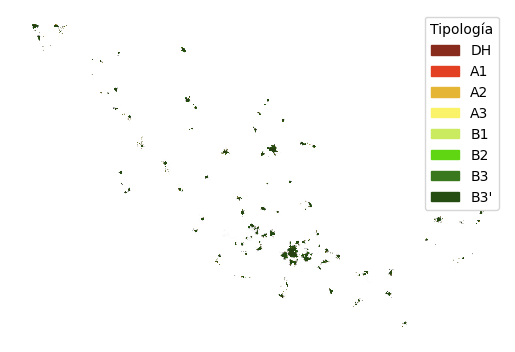

In [6]:
# Paso 7: Representación gráfica rápida (desde código)
import matplotlib.pyplot as plt

def plot_map_with_legend(gdf, colormap, legend_labels, legend_title, save_path):
    fig, ax = plt.subplots(1, 1)

    # Mapear cada categoría a su color correspondiente
    for category, color in colormap.items():
        MAPA_TIPO_gdf_FILTRO[MAPA_TIPO_gdf_FILTRO['TIPOLOGIA'] == category].plot(ax=ax, color=color, label=category, edgecolor='none')

    # Crear leyenda
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colormap.values()]
    ax.legend(handles, legend_labels, title=legend_title)

    # Eliminar línea de contorno
    ax.axis('off')

    # Guardar el mapa como imagen
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# Definir el diccionario de colores
colormap = {
    'DH': '#882A1C',
    'A1': '#E33F22',
    'A2': '#E5B636',
    'A3': '#FAF36A',
    'B1': '#CAEA60',
    'B2': '#60D512',
    'B3': '#39781C',
    'B3\'': '#254D12'
}

# Definir etiquetas para la leyenda
legend_labels = list(colormap.keys())

# Título de la leyenda
legend_title = 'Tipología'

# Ruta donde se guardará el mapa
map_image_path = mapa_rapido_ruta

# Llamar a la función para generar y guardar el mapa
plot_map_with_legend(MAPA_TIPO_gdf_FILTRO, colormap, legend_labels, legend_title, map_image_path)
